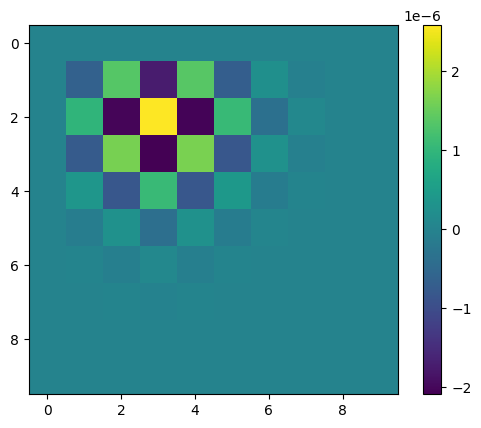

In [108]:
import numpy as np

def initialize_block(rows, cols, disturbance_location):
    block = np.zeros((rows, cols))
    block[disturbance_location[0], disturbance_location[1]] = 1.0
    return block

def calculate_total_force(block, K1, K2, KL):
    rows, cols = block.shape
    total_force = np.zeros_like(block)
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            total_force[i, j] = K1 * (2 * block[i, j] - block[i-1, j] - block[i+1, j]) \
                                + K2 * (2 * block[i, j] - block[i, j-1] - block[i, j+1]) \
                                + KL * block[i, j]
    return total_force

def distribute_forces(block, delta_force, alpha1, alpha2):
    rows, cols = block.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            block[i+1, j] += delta_force[i+1, j] * alpha1
            block[i-1, j] += delta_force[i-1, j] * alpha1
            block[i, j+1] += delta_force[i, j+1] * alpha2
            block[i, j-1] += delta_force[i, j-1] * alpha2
            block[i, j] = 0
    return block

def simulate_spring_block_model(rows, cols, K1, K2, KL, iterations):
    block = initialize_block(rows, cols, disturbance_location)
    alpha1 = K1 / (2 * K1 + 2 * K2 + KL)
    alpha2 = K1 / (2 * K1 + 2 * K2 + KL)
    for _ in range(iterations):
        total_force = calculate_total_force(block, K1, K2, KL)
        delta_force = {'i+1': total_force.copy(), 'i-1': total_force.copy(), 'j+1': total_force.copy(), 'j-1': total_force.copy()}
        block = distribute_forces(block, delta_force['i+1'], alpha1, 0)
        block = distribute_forces(block, delta_force['i-1'], alpha1, 0)
        block = distribute_forces(block, delta_force['j+1'], 0, alpha2)
        block = distribute_forces(block, delta_force['j-1'], 0, alpha2)
    return block

rows, cols = 10, 10
K1 = 0.2
K2 = 0.2
KL = 0.2
iterations = 10
disturbance_location = (2, 3)

initial_block = initialize_block(rows, cols, disturbance_location)
#print("Initial Block:")
#print(initial_block)

resulting_block = simulate_spring_block_model(rows, cols, K1, K2, KL, iterations)
#print("\nResulting Block after Simulation:")
#print(resulting_block)

plt.imshow(resulting_block, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()
